In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Add, Dense, Activation, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from keras import metrics
from keras.models import model_from_json

In [33]:
from tensorflow.examples.tutorials.mnist import input_data

In [34]:
mnist = input_data.read_data_sets("MNIST/",one_hot=True)

Extracting MNIST/train-images-idx3-ubyte.gz
Extracting MNIST/train-labels-idx1-ubyte.gz
Extracting MNIST/t10k-images-idx3-ubyte.gz
Extracting MNIST/t10k-labels-idx1-ubyte.gz


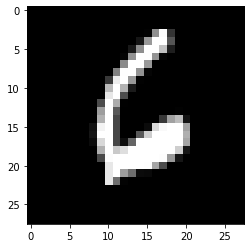

In [40]:
plt.imshow(mnist.train.images[3].reshape(28,28),cmap = 'gist_gray')

In [41]:
mnist.train.labels[3]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [42]:
def model(input_shape = (28,28,1), classes = 10):
    X_input = Input(input_shape)
    
    X = Conv2D(filters=6, kernel_size= (5,5), strides=1, padding='same',name = 'CONV-Layer-1', kernel_initializer=glorot_uniform(seed = 0))(X_input)
    X = BatchNormalization(axis = 3, name = 'BatchN-Layer-1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid', name = 'Padding-Layer-1')(X)
    
    X = Conv2D(16, kernel_size=(5,5), strides=1, padding = 'valid', name = 'CONV-Layer-2', kernel_initializer=glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3)(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size=(2,2), strides=2, padding='valid')(X)
    
    X = Flatten()(X)
    X = Dense(120, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dense(84, activation='relu',kernel_initializer=glorot_uniform(seed = 0))(X)
    X = Dense(classes, activation = 'softmax', kernel_initializer=glorot_uniform(seed = 0))(X)
   
    model = Model(inputs = X_input, outputs = X, name = "LeNet - Partial")
    
    return model

In [43]:
model = model()

In [44]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [45]:
X_train_1 = mnist.train.images.reshape(-1,28,28,1)
X_test = mnist.test.images.reshape(-1,28,28,1)
Y_train_1 = mnist.train.labels
Y_test = mnist.test.labels

In [46]:
X_new = 1-X_train_1

In [47]:
X_train = np.append(X_train_1,X_new,axis=0)
Y_train = np.append(Y_train_1,Y_train_1,axis=0)
X_train.shape

(110000, 28, 28, 1)

In [48]:
model.fit(X_train, Y_train, epochs = 15, batch_size = 32)


Epoch 1/15
110000/110000 [==============================] - 66s 602us/step - loss: 0.1399 - accuracy: 0.9561
Epoch 2/15
110000/110000 [==============================] - 67s 613us/step - loss: 0.0548 - accuracy: 0.9825
Epoch 3/15
110000/110000 [==============================] - 67s 610us/step - loss: 0.0406 - accuracy: 0.9869
Epoch 4/15
110000/110000 [==============================] - 67s 611us/step - loss: 0.0325 - accuracy: 0.9894
Epoch 5/15
110000/110000 [==============================] - 67s 612us/step - loss: 0.0263 - accuracy: 0.9916
Epoch 6/15
110000/110000 [==============================] - 68s 616us/step - loss: 0.0222 - accuracy: 0.9924
Epoch 7/15
110000/110000 [==============================] - 72s 651us/step - loss: 0.0195 - accuracy: 0.9938
Epoch 8/15
110000/110000 [==============================] - 67s 613us/step - loss: 0.0166 - accuracy: 0.9942
Epoch 9/15
110000/110000 [==============================] - 68s 616us/step - loss: 0.0144 - accuracy: 0.9954
Epoch 10/15
110000

In [49]:
Y_pred = model.predict(X_test)
Y_pred = (np.max(Y_pred) == Y_pred)*1

[0 0 1 0 0 0 0 0 0 0]


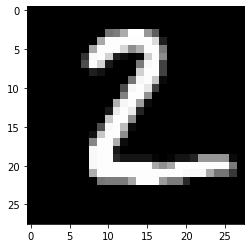

In [50]:
plt.imshow(X_test[1].reshape(28,28),cmap = 'gist_gray')
print(Y_pred[1])

In [51]:
model.evaluate(X_test,Y_test)

10000/10000 [==============================] - 2s 191us/step


[0.03892653084457423, 0.9909999966621399]

In [53]:
model_json = model.to_json()
with open('model.json',"w") as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')